# Step. 1 Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('WebsiteTrafficAnalysis.csv')

In [2]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB
None


In [3]:
# Check for missing values
print('\
Missing values:\
', df.isnull().sum())

Missing values: Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64


In [4]:
# Display the first few rows of the data
print('\
First few rows of the data:')
print(df.head())

First few rows of the data:
   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  


In [5]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Convert numeric columns to appropriate data types
numeric_columns = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

print('\
Dataset after preprocessing:')
print(df.info())

print('\
Summary statistics:')
print(df.describe())

print('Done preprocessing the data.')

Dataset after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                2167 non-null   int64         
 1   Day                2167 non-null   object        
 2   Day.Of.Week        2167 non-null   int64         
 3   Date               2167 non-null   datetime64[ns]
 4   Page.Loads         2167 non-null   int64         
 5   Unique.Visits      2167 non-null   int64         
 6   First.Time.Visits  2167 non-null   int64         
 7   Returning.Visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 135.6+ KB
None
Summary statistics:
               Row  Day.Of.Week   Page.Loads  Unique.Visits  \
count  2167.000000  2167.000000  2167.000000    2167.000000   
mean   1084.000000     3.997231  4116.989386    2943.646516   
std     625.703338     2.00022

# Step 2. Exploratory Data Analysis(EDA)

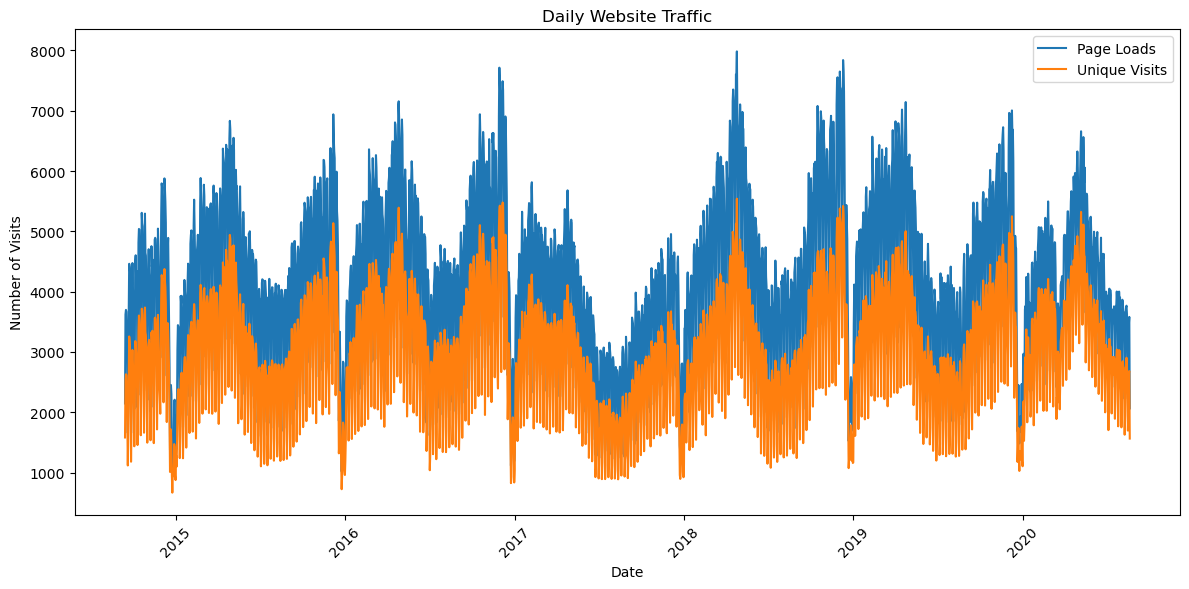

In [7]:
# 1. Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Page.Loads'], label='Page Loads')
plt.plot(df['Date'], df['Unique.Visits'], label='Unique Visits')
plt.title('Daily Website Traffic')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_traffic.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

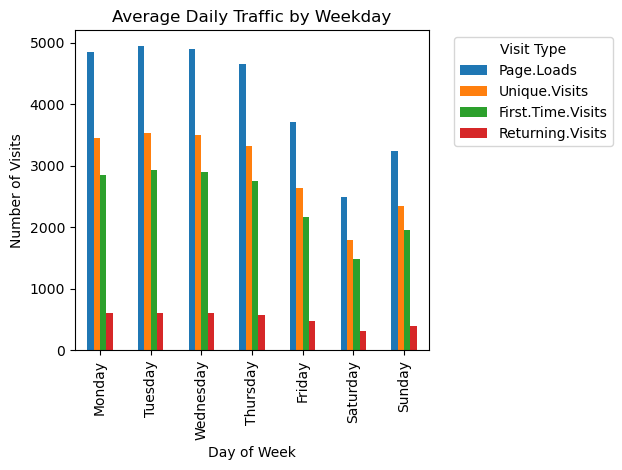

In [8]:
# 2. Weekly Patterns
df['Weekday'] = df['Date'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_avg = df.groupby('Weekday')[numeric_columns].mean().reindex(weekday_order)

plt.figure(figsize=(12, 6))
weekly_avg.plot(kind='bar')
plt.title('Average Daily Traffic by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Visits')
plt.legend(title='Visit Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('weekly_patterns.png')
plt.show()

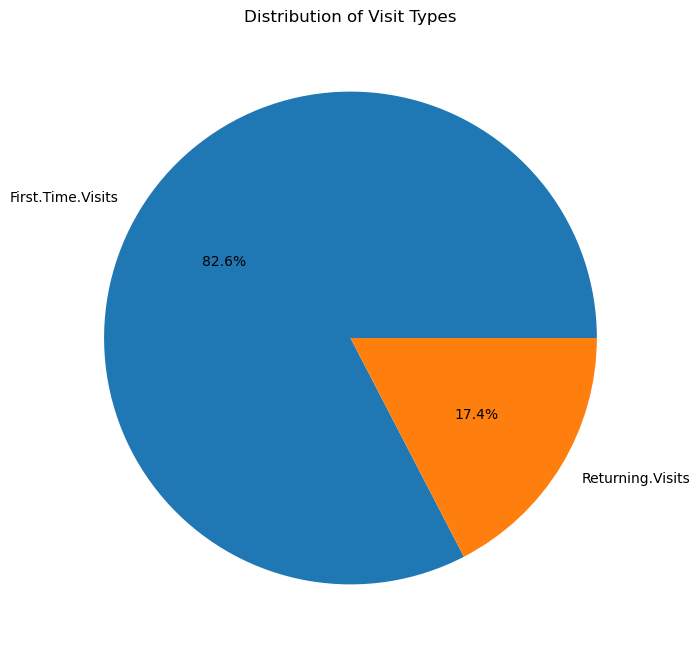

In [9]:
# 3. Visit Type Distribution
visit_types = df[['First.Time.Visits', 'Returning.Visits']].sum()
plt.figure(figsize=(8, 8))
plt.pie(visit_types, labels=visit_types.index, autopct='%1.1f%%')
plt.title('Distribution of Visit Types')
plt.savefig('visit_type_distribution.png')
plt.show()

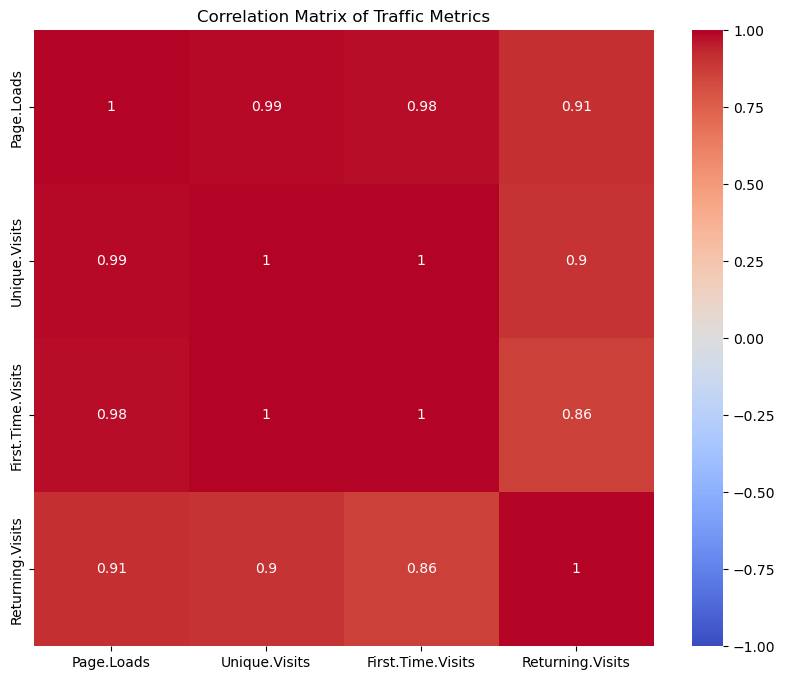

In [10]:
# 4. Correlation Analysis
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Traffic Metrics')
plt.savefig('correlation_matrix.png')
plt.show()

In [11]:
# 5. Summary Statistics
summary_stats = df[numeric_columns].describe()
print('Summary Statistics:')
print(summary_stats)

Summary Statistics:
        Page.Loads  Unique.Visits  First.Time.Visits  Returning.Visits
count  2167.000000    2167.000000        2167.000000       2167.000000
mean   4116.989386    2943.646516        2431.824181        511.822335
std    1350.977843     977.886472         828.704688        168.736370
min    1002.000000     667.000000         522.000000        133.000000
25%    3114.500000    2226.000000        1830.000000        388.500000
50%    4106.000000    2914.000000        2400.000000        509.000000
75%    5020.500000    3667.500000        3038.000000        626.500000
max    7984.000000    5541.000000        4616.000000       1036.000000


In [12]:
# 6. Top 10 Days with Highest Traffic
top_10_days = df.nlargest(10, 'Page.Loads')[['Date', 'Page.Loads', 'Unique.Visits']]
print('\
Top 10 Days with Highest Traffic:')
print(top_10_days)

print('EDA completed. Visualizations saved as PNG files.')

Top 10 Days with Highest Traffic:
           Date  Page.Loads  Unique.Visits
1319 2018-04-25        7984           5541
1548 2018-12-10        7840           5421
807  2016-11-29        7714           5338
1549 2018-12-11        7659           5267
1541 2018-12-03        7650           5378
1318 2018-04-24        7614           5094
1317 2018-04-23        7605           5124
1536 2018-11-28        7554           5227
1535 2018-11-27        7503           5181
808  2016-11-30        7490           5425
EDA completed. Visualizations saved as PNG files.


# Step 3. RFM Metrics

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df is already loaded and processed as per your earlier code

# Calculate RFM metrics
last_date = df['Date'].max()
rfm = df.groupby('Date').agg({
    'Date': lambda x: (last_date - x.max()).days,  # Recency
    'Unique.Visits': 'count',  # Frequency
    'Page.Loads': 'sum'  # Monetary (using Page Loads as a proxy)
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

# Normalize RFM values
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 4. Customer Segmentation

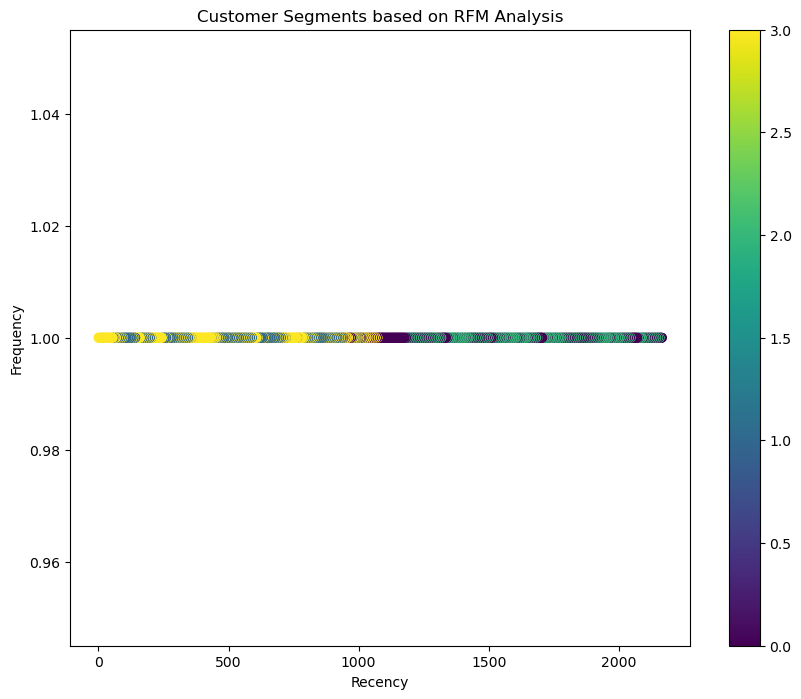

C:\Users\Admin\AppData\Local\Temp\ipykernel_15952\675877146.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_avg = rfm.groupby('Cluster').mean()


Cluster Averages:
             Recency  Frequency     Monetary
Cluster                                     
0        1518.000000        1.0  2726.330241
1         521.979021        1.0  5562.072261
2        1662.659468        1.0  5006.554817
3         508.892797        1.0  3437.100503


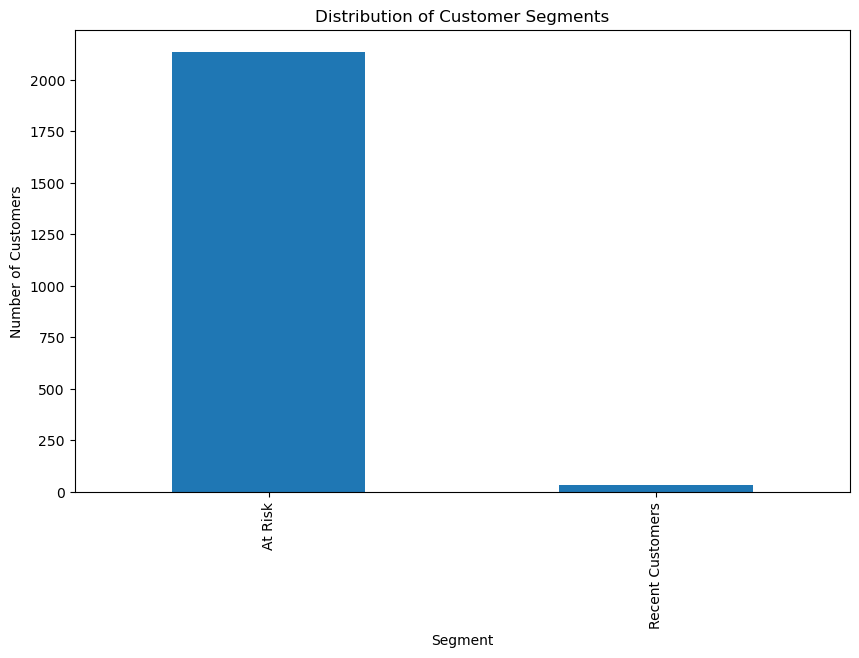

Segment Distribution:
At Risk             2136
Recent Customers      31
Name: Segment, dtype: int64


In [14]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualize clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Cluster'], cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segments based on RFM Analysis')
plt.savefig('rfm_clusters.png')
plt.show()

# Calculate average values for each cluster
cluster_avg = rfm.groupby('Cluster').mean()
print('Cluster Averages:')
print(cluster_avg)

# Assign labels to clusters
def assign_label(row):
    if row['Recency'] <= 7 and row['Frequency'] > cluster_avg['Frequency'].mean():
        return 'Active High-Value'
    elif row['Recency'] <= 30:
        return 'Recent Customers'
    elif row['Frequency'] > cluster_avg['Frequency'].mean():
        return 'Loyal Customers'
    else:
        return 'At Risk'

rfm['Segment'] = rfm.apply(assign_label, axis=1)

# Visualize segment distribution
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.savefig('segment_distribution.png')
plt.show()

print('\
Segment Distribution:')
print(segment_counts)

# Step 5. Generate insights and recommendations

In [15]:
# Generate insights and recommendations
print('Insights and Recommendations:')
for segment in rfm['Segment'].unique():
    segment_data = rfm[rfm['Segment'] == segment]
    print(f'{segment}:')
    print(f'  - Average Recency: {segment_data["Recency"].mean():.2f} days')
    print(f'  - Average Frequency: {segment_data["Frequency"].mean():.2f} visits')
    print(f'  - Average Monetary Value: {segment_data["Monetary"].mean():.2f} page loads')
    
    if segment == 'Active High-Value':
        print('  Recommendation: Offer exclusive content or early access to new features to maintain engagement.')
    elif segment == 'Recent Customers':
        print('  Recommendation: Provide personalized onboarding and highlight key features to encourage repeat visits.')
    elif segment == 'Loyal Customers':
        print('  Recommendation: Implement a loyalty program to reward consistent engagement and increase visit frequency.')
    else:  # At Risk
        print('  Recommendation: Re-engage with targeted email campaigns or special promotions to bring them back to the site.')

print('RFM Analysis, Customer Segmentation, and Insights completed. Visualizations saved as PNG files.')

Insights and Recommendations:
At Risk:
  - Average Recency: 1098.50 days
  - Average Frequency: 1.00 visits
  - Average Monetary Value: 4129.03 page loads
  Recommendation: Re-engage with targeted email campaigns or special promotions to bring them back to the site.
Recent Customers:
  - Average Recency: 15.00 days
  - Average Frequency: 1.00 visits
  - Average Monetary Value: 3287.65 page loads
  Recommendation: Provide personalized onboarding and highlight key features to encourage repeat visits.
RFM Analysis, Customer Segmentation, and Insights completed. Visualizations saved as PNG files.
